# Mall Customer Segmentation

### 1. Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns = {'Genre': 'Gender'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.drop(["CustomerID"], axis=1, inplace=True)

In [12]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 2. Visualization

In [16]:
import warnings
warnings.filterwarnings('ignore')

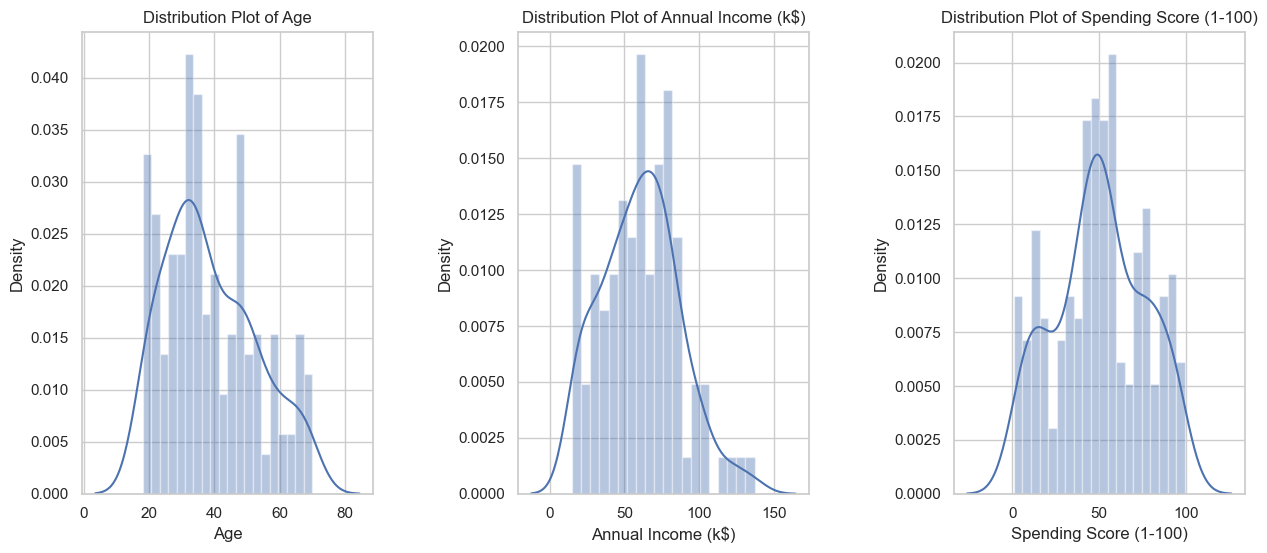

In [23]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distribution Plot of {}'.format(x))
plt.show()

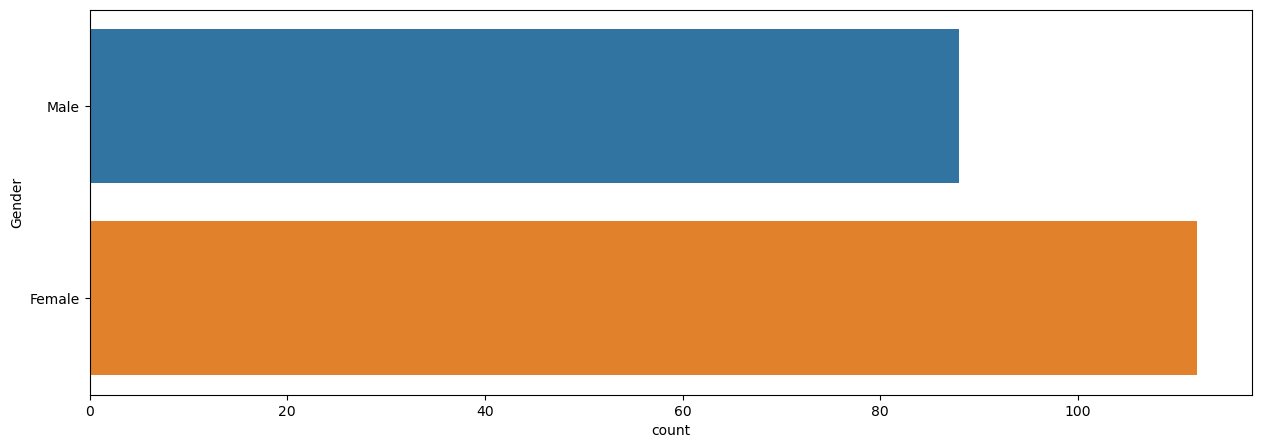

In [18]:
plt.figure(figsize = (15,5))
sns.countplot(y = 'Gender', data = df)
plt.show()

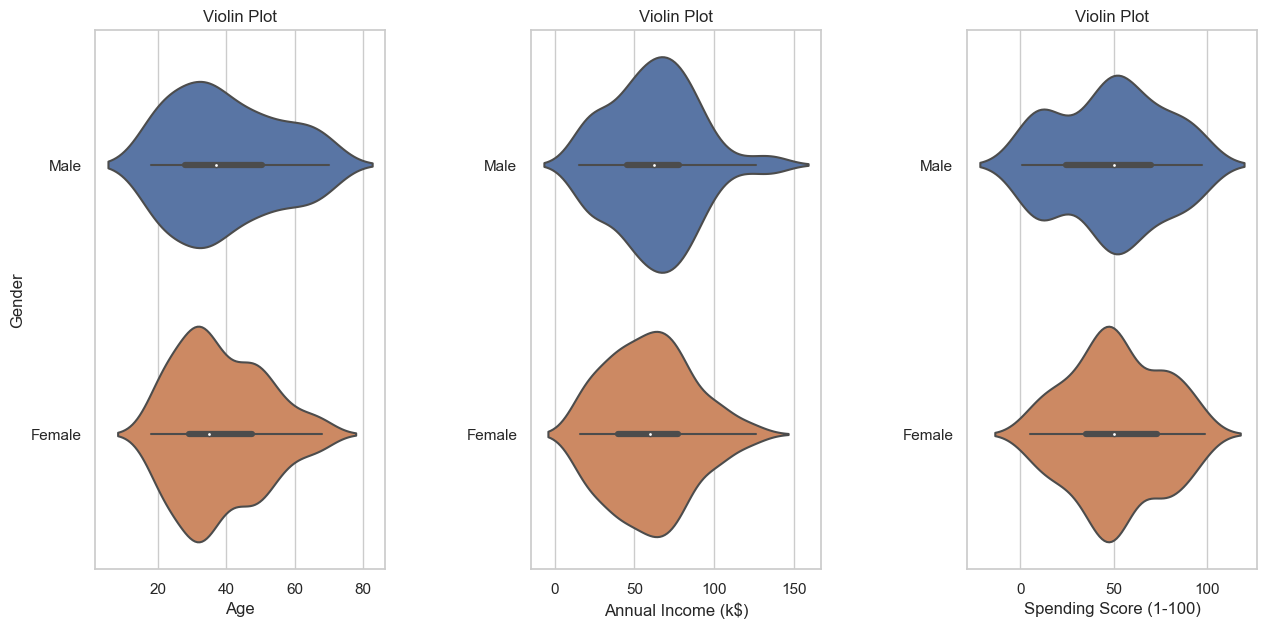

In [22]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1else '')
    plt.title('Violin Plot' )
plt.show()

#### Dividing Age into smaller categories

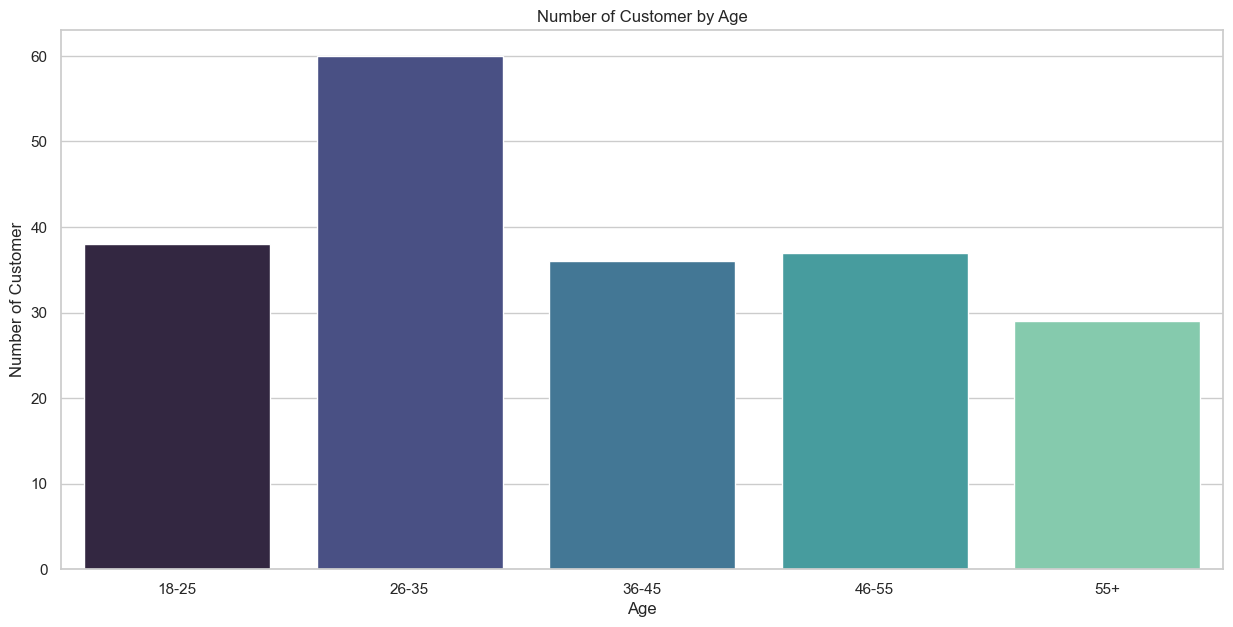

In [26]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55up = df.Age[(df.Age >= 56)]
                  
agex = ['18-25', '26-35', '36-45', '46-55', '55+']
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55up.values)]
                  
plt.figure(figsize = (15,7))
sns.barplot(x = agex, y = agey, palette = 'mako')
plt.title('Number of Customer by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

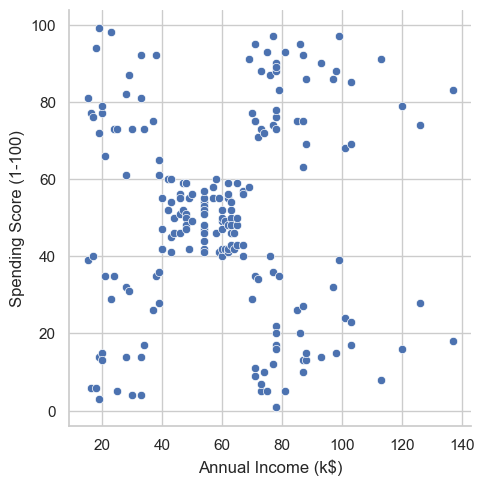

In [28]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data=df)


#### Dividing spending score into smaller categories

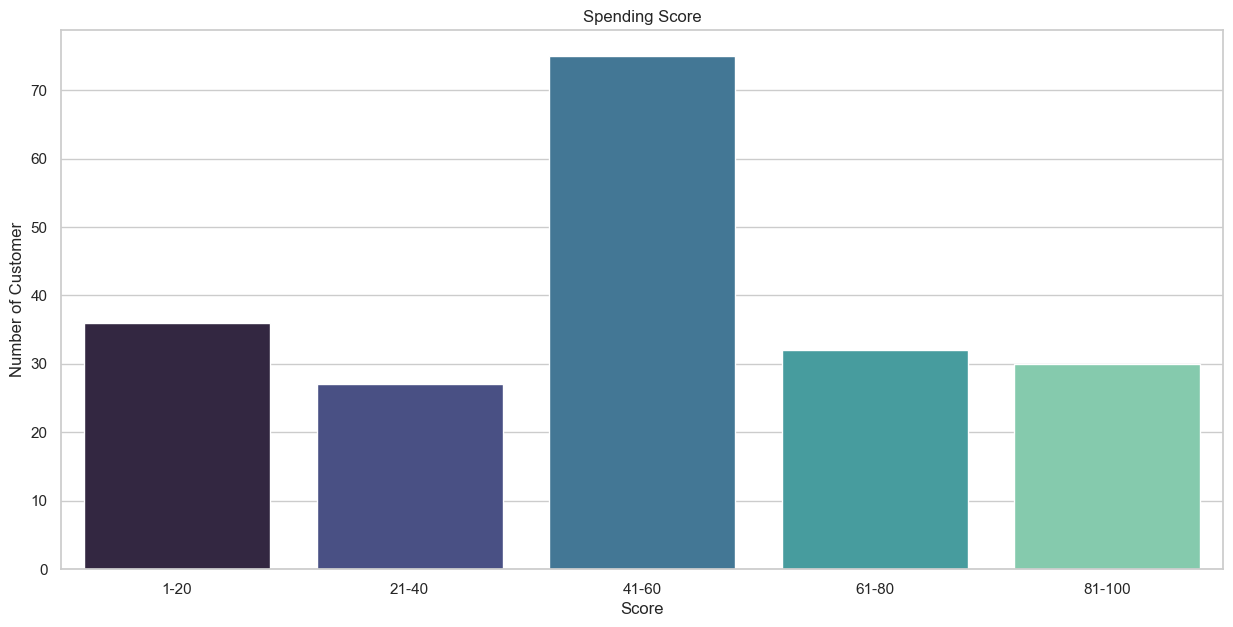

In [29]:
ss_1_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)']>=81) & (df['Spending Score (1-100)'] <= 100)]

ssx = ['1-20', '21-40', '41-60', '61-80', '81-100']
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]
                  
plt.figure(figsize = (15,7))
sns.barplot(x = ssx, y = ssy, palette = 'Spectral')
plt.title('Spending Score')
plt.xlabel('Score')
plt.ylabel('Number of Customer')
plt.show()

#### Dividing Annual Income into smaller categories

min value = 15,00000
max valuev= 137, 0000

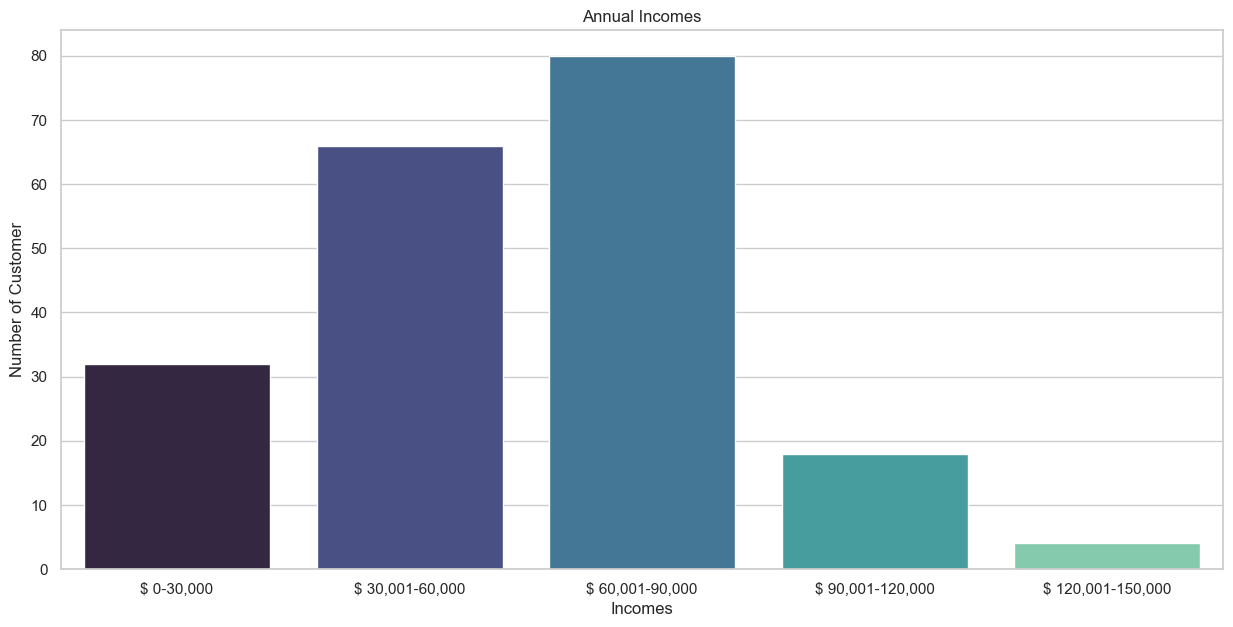

In [30]:
ann0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ann31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ann61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ann91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ann121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

annx = ['$ 0-30,000', '$ 30,001-60,000', '$ 60,001-90,000', '$ 90,001-120,000', '$ 120,001-150,000']
anny = [len(ann0_30.values), len(ann31_60.values), len(ann61_90.values), len(ann91_120.values), len(ann121_150.values)]
                  
plt.figure(figsize = (15,7))
sns.barplot(x = annx, y = anny, palette = 'mako')
plt.title('Annual Incomes')
plt.xlabel('Incomes')
plt.ylabel('Number of Customer')
plt.show()

### 4. Clustering

#### Based on Age and Spending Score

Elbow method for finding optimum number of clusters

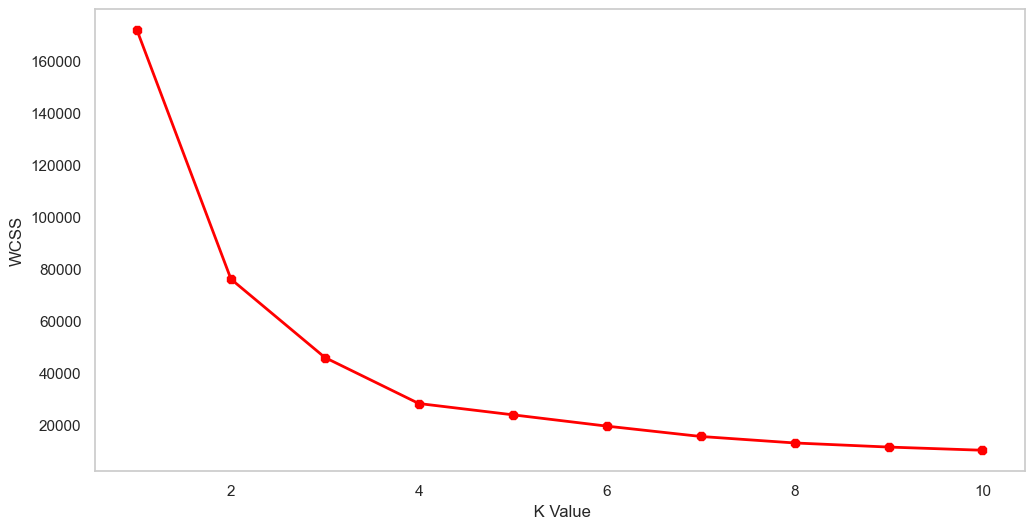

In [33]:
X1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color='red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans  = KMeans(n_clusters = 4)

label = kmeans.fit_predict(X1)

print(label)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [41]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


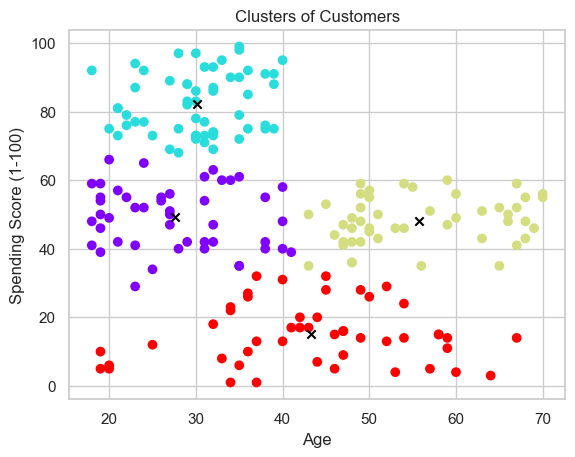

In [45]:

# Plotting the clusters
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

#### Clusters Based on Annual Income and Spending Score

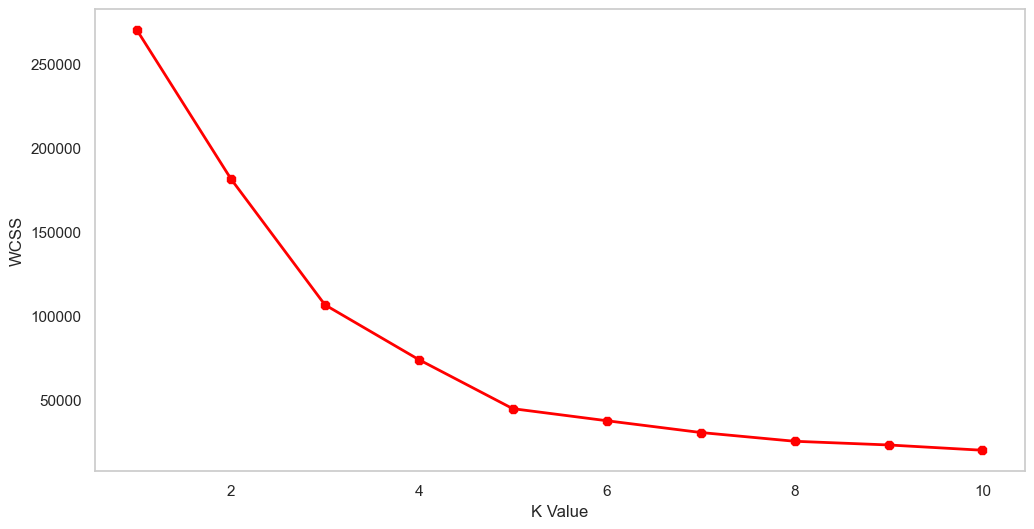

In [46]:
X2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color='red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [47]:
kmeans  = KMeans(n_clusters = 5)

label = kmeans.fit_predict(X2)

print(label)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 4 3 1 3 4 3 4 3 1 3 4 3 4 3 4 3 4 3 1 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]


In [48]:
#checking the centroids
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]]


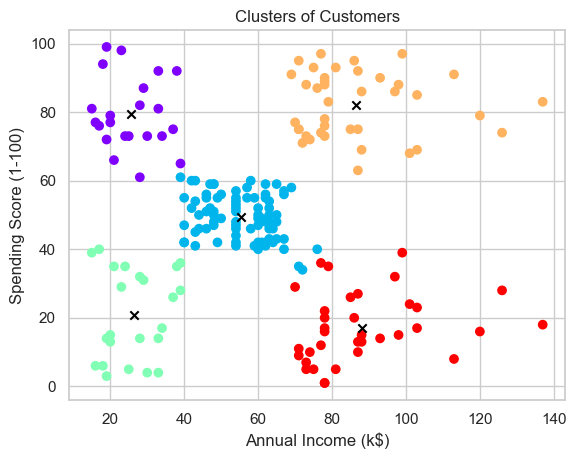

In [49]:
# Plotting the clusters
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Cluster of Annual Income, Age and Spending Score

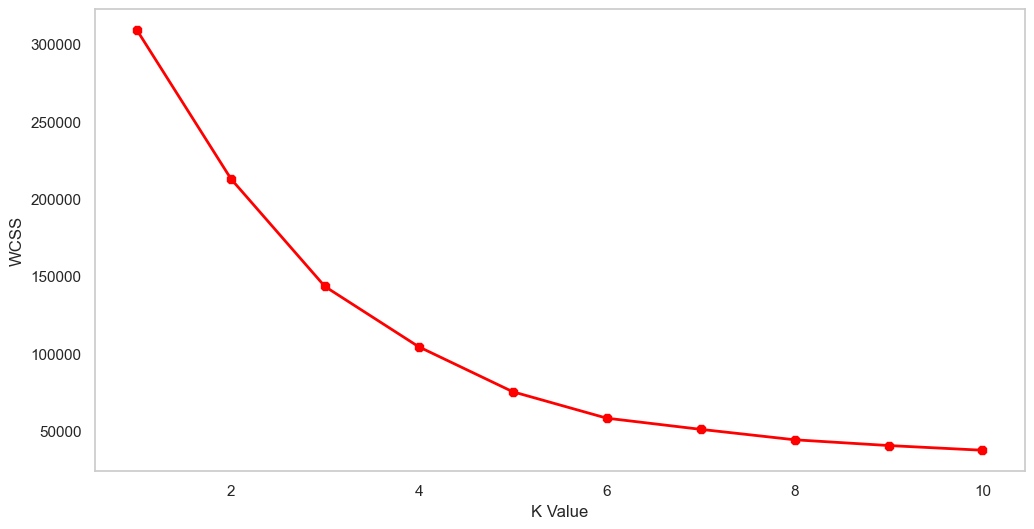

In [50]:
X3 = df.iloc[:, 1:]

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++')
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize =(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color='red', marker = '8')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans  = KMeans(n_clusters = 5)

label = kmeans.fit_predict(X3)

print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [52]:
print(kmeans.cluster_centers_)

[[40.32432432 87.43243243 18.18918919]
 [43.28205128 55.02564103 49.69230769]
 [25.52173913 26.30434783 78.56521739]
 [32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]]


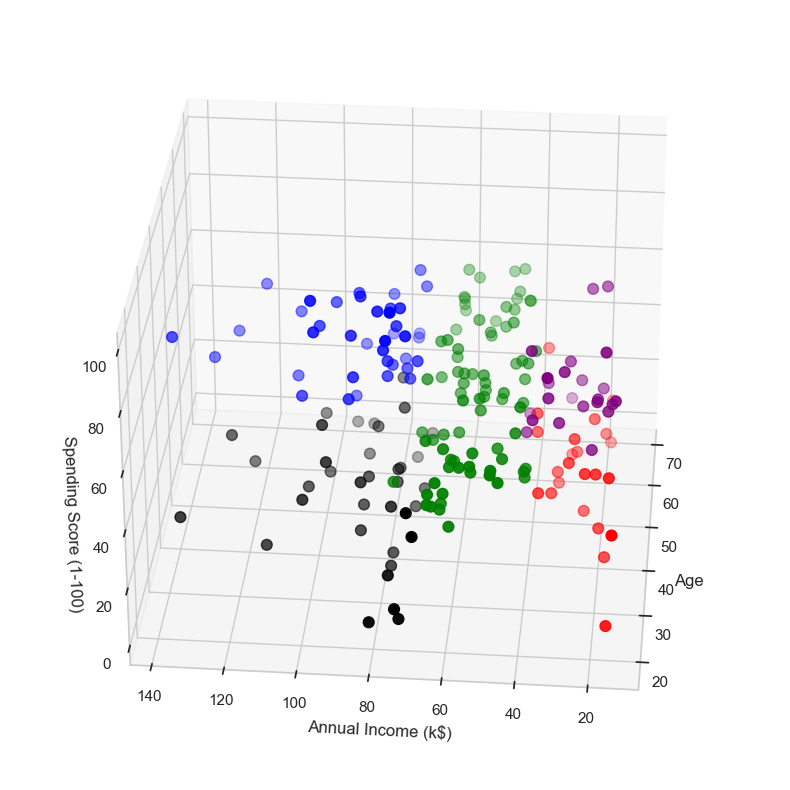

In [54]:
# Plotting the clusters
clusters = kmeans.fit_predict(X3)
df['label'] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df.Age[df.label == 0], df['Annual Income (k$)'][df.label == 0], df['Spending Score (1-100)'][df.label == 0], c = 'red', s=60)
ax.scatter(df.Age[df.label == 1], df['Annual Income (k$)'][df.label == 1], df['Spending Score (1-100)'][df.label == 1], c = 'blue', s=60)
ax.scatter(df.Age[df.label == 2], df['Annual Income (k$)'][df.label == 2], df['Spending Score (1-100)'][df.label == 2], c = 'black', s=60)
ax.scatter(df.Age[df.label == 3], df['Annual Income (k$)'][df.label == 3], df['Spending Score (1-100)'][df.label == 3], c = 'green', s=60)
ax.scatter(df.Age[df.label == 4], df['Annual Income (k$)'][df.label == 4], df['Spending Score (1-100)'][df.label == 4], c = 'purple', s=60)
ax.view_init(30,185)

plt.xlabel('Age')
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.show()
